# Assignment No 2c

Text Classification (Sentiment Analysis) Using Bayes Rule 
==============
*Sibt ul Hussain*

## Goal

Your goal in this part of assigment is to implement a Naive Bayes Multinomial classifier using  bag of words model for the classification of text (movie reviews) into different categories..

**Note** Please note that you are allowed to use only those libraries which we have discussed in the class, i.e. numpy, scipy, pandas.

Once you have build and test the model on the provided dataset. You will use the learned techniques to compete in a [Kaggle](https://www.kaggle.com/c/word2vec-nlp-tutorial) competition and report your final score and leaderboard ranking to get full credit.

For final submission attach the screen-shot of the leader-board with your score.

## Submission Instructions
You are required to submit the original notebook file on the Slate (with .ipynb extension), with complete set of outputs. Students failing to do so will get zero marks. 

*Please read each step carefully and understand it fully before proceeding with code writing*

## Plagiarism
Any form of plagiarism will not be tolerated and result in 0 marks.


In [1]:
%pylab inline
import scipy.stats
from collections import defaultdict
import copy

Populating the interactive namespace from numpy and matplotlib


In [146]:
import re
import bs4

def parse_string(string): 
    """"
        Parse the input string and tokenize it using regular expressisons:
        First clean the string such that it does not have any punctuation or number, it must only have a-z and A-Z.
        Please note that while doing this, the spaces much not get disturbed, but in case of multiple spaces convert 
        them to one space.
        Then convert the string to lower case and return its words as a list of strings.
        
        Example:
        --------
        Input :  computer scien_tist-s are,,,  the  rock__stars of tomorrow_ <cool>  ????
        Output:  ['computer', 'scientists', 'are', 'the', 'rockstars', 'of', 'tomorrow']
        
        Parameters:
        ----------
        string: string to be parsed...
        re: regular expression to be used for the tokenization.
        
        Returns:
        ---------
        list of tokens extracted from the string...
    """
    
    # YOUR CODE HERE
    string = string.replace('-','')
    string = string.replace('_','')
    string = re.sub(r'[^a-zA-Z]',' ',string)
    string = ' '.join(string.lower().split())
    return string.split()

In [147]:
def parse_file(filename): # Parse a given file
    """"
        Parameters:
        ----------
        filename: name of text file to be read
   
        
        Returns:
        ---------
        read file as raw string (with \n, \t, \r, etc included)
    """
    # YOUR CODE HERE
    pass

In [148]:
def files_to_strings(X):
    
    """
        Read an array (or list) of files where each file content is read in a string...
        Input:
        -------
        X an array (or list) of file names
        
        Returns:
        --------
        X as a numpy array with each row containing a read string from the file...
    """
    
    # YOUR CODE HERE
    total_words_list = []
    for file_name in X:
        f = open(file_name,'r')
        line = f.read()
        total_words_list.append(line)
    return np.array(total_words_list)

In [149]:
from nose.tools import assert_equal, assert_list_equal

assert_list_equal(parse_string("computer scien_tist-s are,,,  the  rock__stars of tomorrow_ <cool>  ????"),
        [u'computer', u'scientists', u'are', u'the', u'rockstars', u'of', u'tomorrow', u'cool'], "Incorrect cleanning")


strings = files_to_strings(np.array(["./data/imdb1/neg/cv000_29416.txt", "./data/imdb1/pos/cv000_29590.txt"]))
with open("./data/imdb1/neg/cv000_29416.txt") as f:
    text = f.read()
    
assert_equal(strings[0], text, "At first index should be text of first file")
assert_equal(strings.shape, (2,), "Shape must be (2,) for two files in list")

In [150]:
# YOUR CODE HERE
#raise NotImplementedError()
        
## Hint, you can use python dictionary or default dict for counting the words
# or counter class from collections 

#TODO Complete this class for running the complete classifier... 

#You might need to define auxiliary classes for the complete algorithm..

class NaiveBayes:
    ''' Implements the Naive Bayes For Text Classification... '''
    def __init__(self, classes):
        self.classes=classes
        
        # YOUR CODE HERE
        pass
        
    def addExample(self, x, y):
        '''
            Add example to corresponding class model ...
            Input
            ---------
            x: example (list of words)
            y: label...
        '''
        
        # YOUR CODE HERE
        pass
        

            
        
    def train(self, X, Y):
        ''' Train the multiclass (or Binary) Bayes Rule using the given 
            X [m x d] data matrix and Y labels matrix
            
            Input:
            ------
            X: [m x d] a data matrix of m d-dimensional examples.
            Y: [m x 1] a label vector.
            
            Returns:
            -----------
            Nothing
            '''
        # YOUR CODE HERE
        
        #Intialize Variables
        documents_size = np.shape(X)[0]
        total_unique_words = []
        len_of_unique_words = 0
        pos_prior = 0
        neg_prior = 0
        class_pos = ''
        class_neg = ''
        pos_dict = defaultdict(int)
        neg_dict = defaultdict(int)
        stop_words = []
        psuedo_pos = 0
        psuedo_neg = 0
        pos_count = 0
        neg_count = 0
        
#         #Read stop words
#         f = open('./data/english.stop')
#         line = f.read()
#         stop_words = line.split()

        #Calculate prior probability
        unique,counts = numpy.unique(Y, return_counts=True)
        class_neg,class_pos = unique[0],unique[1]
        neg_prior,pos_prior = counts[0]/float(documents_size),counts[1]/float(documents_size)
        class_neg_count,class_pos_count = counts[0],counts[1]

        #Take unique count of X
        for document_index in range(documents_size):
            pre_string = parse_string(X[document_index][0])
            if Y[document_index] == class_pos:
                for pos_word in pre_string:
                    pos_dict[pos_word] += 1
                    pos_count += 1
            else:
                for neg_word in pre_string:
                    neg_dict[neg_word] += 1
                    neg_count += 1
        
        #Remove stop words form probability table
#         keys_dict = pos_dict.keys()+neg_dict.keys()
#         unique_keys = np.unique(keys_dict)
#         for key_name in unique_keys:
#             if key_name in stop_words:
#                 pos_count -= pos_dict[key_name]
#                 neg_count -= neg_dict[key_name]
#                 pos_dict.pop(key_name,None)
#                 neg_dict.pop(key_name,None)

        #Set properties
        self.pos_dict = pos_dict
        self.neg_dict = neg_dict
        self.pos_prior = pos_prior
        self.neg_prior = neg_prior
        self.psuedo_pos = len(pos_dict.keys())
        self.psuedo_neg = len(neg_dict.keys())
        self.pos_count = pos_count
        self.neg_count = neg_count
        self.class_pos_count = class_pos_count
        self.class_neg_count = class_neg_count
        
    def test(self, X):
        
        ''' Test the trained classifiers on the given set of examples 
        
                   
            Input:
            ------
            X: [m x d] a data matrix of m d-dimensional test examples.
           
            Returns:
            -----------
                pclass: the predicted class for each example, i.e. to which it belongs
        '''
        
        nexamples, nfeatures=X.shape
                      
        # YOUR CODE HERE        
        pclasses = []
        total_voc_pos,total_voc_neg= len(self.pos_dict),len(self.neg_dict)
        for document_index in range(nexamples):
            count_pos = 0
            count_neg = 0
            pre_string = parse_string(X[document_index][0])
            for word in pre_string:
                count_pos += log((self.pos_dict[word]+1))-log(float(total_voc_pos+self.pos_count))+log(self.pos_prior)
                count_neg += log((self.neg_dict[word]+1))-log(float(total_voc_neg+self.neg_count))+log(self.neg_prior)
            if np.argmax([count_pos,count_neg]) == 0:
                pclasses.append(self.classes[1])
            else:
                pclasses.append(self.classes[0])
        return np.array(pclasses)
        
        
    def predict(self, X):
        '''
            Predict the label of given input example...
            
            Input
            ---------
            x: example (list of words)
            
        '''
        
        # YOUR CODE HERE
        total_voc_pos,total_voc_neg= len(self.pos_dict),len(self.neg_dict)
        count_pos = 0
        count_neg = 0
        for word in X:
            count_pos += log((self.pos_dict[word]+1))-log(float(total_voc_pos+self.pos_count))+log(self.pos_prior)
            count_neg += log((self.neg_dict[word]+1))-log(float(total_voc_neg+self.neg_count))+log(self.neg_prior)
        if count_pos > count_neg:
            return self.classes[1]
        else:
            return self.classes[0]

In [151]:
import pandas as pd
import tools as t

In [152]:
tdir= "./data/imdb1/" # training dir...
#load data, get list of files for each class...
posfiles=t.get_files(tdir+'/pos','*',withpath=True)
negfiles=t.get_files(tdir+'/neg','*',withpath=True)

In [153]:
#generate training and testing data...
plabels=['pos']*len(posfiles)
nlabels=['neg']*len(posfiles)
labels=np.concatenate((plabels,nlabels)) # concatenate the +ve and -ve labels
tX=np.concatenate((posfiles,negfiles))
print "Training data Dimensions =", tX.shape," Training labels dimensions=", labels.shape

Training data Dimensions = (2000,)  Training labels dimensions= (2000,)


In [154]:
X=files_to_strings(tX) # read files and convert each file into set of strings and return an numpy array
X = X.reshape((X.shape[0], 1))
#Split the data into two halves training and test set...
traindata,trainlabels,testdata,testlabels=t.split_data(X,labels)
#Find the classes to train
classes=np.unique(labels)

In [155]:
#Now build a Naive Bayes classifier and test it...
print '[Info] training a classifier for following classes {}, {}'.format(classes[0],classes[1])
nb=NaiveBayes(classes)
nb.train(traindata,trainlabels)
pclasses=nb.test(testdata)
acc=np.sum(pclasses==testlabels)/float(testlabels.shape[0])
print "[Info] Accuracy = {}".format(acc)

[Info] training a classifier for following classes neg, pos
[Info] Accuracy = 0.808333333333


### Test Cells Start
#### Do not Modify

In [156]:
from nose.tools import assert_in

nb=NaiveBayes(classes)
nb.train(traindata,trainlabels)
assert_equal (nb.test(testdata).shape[0], testdata.shape[0])
assert_in( type(nb.predict(["ok"])) , [str, np.string_, np.str, np.str_] , "Predict should return a label \
                                                                                            not list or array")

In [157]:
from nose.tools import assert_greater

nb=NaiveBayes(classes)
nb.train(traindata,trainlabels)
pclasses=nb.test(testdata)
acc=np.sum(pclasses==testlabels)/float(testlabels.shape[0])
assert_greater(acc, 0.77, "Acc must be greater then 77% you are doing something wrong")    

In [158]:
from nose.tools import assert_equal

comment_pos = "A nice movie, the case was good. Overall a perfect play"
comment_neg = "A waste of time, cast was bad. a clear No!"

#generate training and testing data...
tX=np.concatenate((posfiles,negfiles))
X=files_to_strings(tX)
X = X.reshape((X.shape[0], 1))

plabels=['pos']*len(posfiles)
nlabels=['neg']*len(posfiles)
true_labels = np.concatenate((plabels,nlabels))
inverted_labels = np.concatenate((nlabels,plabels))

true_nb=NaiveBayes(classes)
true_nb.train(X,true_labels)

inverted_nb=NaiveBayes(classes)
inverted_nb.train(X,inverted_labels)

assert_equal( true_nb.predict(comment_pos.split()), "pos" )
assert_equal( true_nb.predict(comment_neg.split()), "neg" )

assert_equal( inverted_nb.predict(comment_pos.split()), "neg" )
assert_equal( inverted_nb.predict(comment_neg.split()), "pos" )

### Test Cells End

# Cross Validation

Now lets throw our methods to winds of different folds and measure their accuracy...

In [159]:
#Now lets generate n-fold training and testing data...
nfolds=10
folds=t.generate_folds(X,labels,nfolds) # generate folds for 
for k in arange(len(folds)):
    print folds[k][0].shape, folds[k][2].shape

Generating CV data for 2 classes
(1800, 1) (200, 1)
(1800, 1) (200, 1)
(1800, 1) (200, 1)
(1800, 1) (200, 1)
(1800, 1) (200, 1)
(1800, 1) (200, 1)
(1800, 1) (200, 1)
(1800, 1) (200, 1)
(1800, 1) (200, 1)
(1800, 1) (200, 1)


In [130]:
totacc=[]
#train a classifier for each fold...
classes=np.unique(labels)

for k in range(nfolds):
    nb=NaiveBayes(classes)
    
    traindata=folds[k][0]
    trainlabels=folds[k][1]
    
    #Lets first train the classifier
    nb.train(traindata,trainlabels)
    
    testdata=folds[k][2]
    testlabels=folds[k][3]
    
    #Lets test the classifier
    pclasses= nb.test(testdata)
    
    #print pclasses
    acc=np.sum(pclasses==testlabels)/float(testlabels.shape[0])
    print "[Info] Fold {} Accuracy = {}".format(k+1, acc)    
    
    totacc.append(acc)

print totacc

mean_acc = np.mean(totacc)
print '[Info] Mean Accuracy =', mean_acc

[Info] Fold 1 Accuracy = 0.79
[Info] Fold 2 Accuracy = 0.8
[Info] Fold 3 Accuracy = 0.785
[Info] Fold 4 Accuracy = 0.8
[Info] Fold 5 Accuracy = 0.79
[Info] Fold 6 Accuracy = 0.815
[Info] Fold 7 Accuracy = 0.85
[Info] Fold 8 Accuracy = 0.8
[Info] Fold 9 Accuracy = 0.81
[Info] Fold 10 Accuracy = 0.855
[0.79000000000000004, 0.80000000000000004, 0.78500000000000003, 0.80000000000000004, 0.79000000000000004, 0.81499999999999995, 0.84999999999999998, 0.80000000000000004, 0.81000000000000005, 0.85499999999999998]
[Info] Mean Accuracy = 0.8095


# Excellent, now its time to go into real waters of Kaggle.


You will be needed to create an account on the Kaggle and download the data for the competition ["Bag of words meets bags of popcorn"](https://www.kaggle.com/c/word2vec-nlp-tutorial/data).  Note that you will be only downloading the "labeledTrainData.tsv" and "labeledTestData.tsv".


"labeledTrainData.tsv" will be used for training your model and thus have prespecified labels for each example review. "labeledTestData.tsv" will be used for testing your model and thus don't have prespecified labels for each example. You will predicting the label for each review and then uploading your result to Kaggle server which will be evaluating your model and will give score to your entry. You will report this score during your assignment submission.

**[Caution]** Please note that Kaggle limits maximum number of evaluations per 24 hours to 5 to reduce the overfitting on the test set, so be careful and throughly test your model before submitting your entry to Kaggle server. 

Read the instructions on the Competition Page. Note you are not allowed to use any of the library except what we have learned during class.

In [131]:
# read the data-set
train=pd.read_csv('./kaggle/labeledTrainData.tsv',sep='\t')

In [132]:
train.describe()

,sentiment
count,25000.00000
mean,0.50000
std,0.50001
min,0.00000
25%,0.00000
50%,0.50000
75%,1.00000
max,1.00000


In [133]:
train.head()

,id,sentiment,review
0,5814_8,1,With all this stuff going down at the moment w...
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi..."
2,7759_3,0,The film starts with a manager (Nicholas Bell)...
3,3630_4,0,It must be assumed that those who praised this...
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...


In [134]:
Yt=train['sentiment']
Xt=train['review']
Xt=np.array(Xt)
Yt=np.array(Yt)

print Xt.shape

(25000,)


In [135]:
#read test set...
test=pd.read_csv('./kaggle/testData.tsv',sep='\t')

In [136]:
test.head()

,id,review
0,12311_10,Naturally in a film who's main themes are of m...
1,8348_2,This movie is a disaster within a disaster fil...
2,5828_4,"All in all, this is a movie for kids. We saw i..."
3,7186_2,Afraid of the Dark left me with the impression...
4,12128_7,A very accurate depiction of small time mob li...


#### Training Time 

In [137]:
# Let's split the training data into two halves and test our accuracy...
traindata,trainlabels,testdata,testlabels=t.split_data(Xt.reshape((Xt.shape[0],1)),Yt)
classes=np.unique(trainlabels)

In [138]:
# Now lets go and train the model and see its performance...
print '[Info] training a classifier for following classes {}, {}'.format(classes[0],classes[1])
nb=NaiveBayes(classes)
nb.train(traindata,trainlabels)
pclasses=nb.test(testdata)
acc=np.sum(pclasses==testlabels)/float(testlabels.shape[0])
print "[Info] Accuracy = {}".format(acc) 

[Info] training a classifier for following classes 0, 1
[Info] Accuracy = 0.831866666667


#### Cross-Validation Time...

In [139]:
#Split the training data into 10 folds and test classifiers performance...

nfolds=10
folds=t.generate_folds(Xt.reshape((Xt.shape[0],1)),Yt,nfolds) # generate folds for 
for k in arange(len(folds)):
    print folds[k][0].shape, folds[k][2].shape

Generating CV data for 2 classes
(22500, 1) (2500, 1)
(22500, 1) (2500, 1)
(22500, 1) (2500, 1)
(22500, 1) (2500, 1)
(22500, 1) (2500, 1)
(22500, 1) (2500, 1)
(22500, 1) (2500, 1)
(22500, 1) (2500, 1)
(22500, 1) (2500, 1)
(22500, 1) (2500, 1)


In [140]:
# As it takes time, so becareful it can cause your machine into red hot oven
totacc=[]
classes=np.unique(Yt)

for k in range(nfolds):
    nb=NaiveBayes(classes)
    
    traindata=folds[k][0]
    trainlabels=folds[k][1]
    
    #Lets first train the classifier
    nb.train(traindata,trainlabels)
    
    testdata=folds[k][2]
    testlabels=folds[k][3]
    
    #Lets test the classifier
    pclasses= nb.test(testdata)
    
    acc=np.sum(pclasses==testlabels)/float(testlabels.shape[0])
    print "[Info] Fold {} Accuracy = {}".format(k+1, acc)    
    
    totacc.append(acc)

print totacc
print '[Info] Mean Accuracy =', np.mean(totacc)

[Info] Fold 1 Accuracy = 0.8456
[Info] Fold 2 Accuracy = 0.858
[Info] Fold 3 Accuracy = 0.8524
[Info] Fold 4 Accuracy = 0.8352
[Info] Fold 5 Accuracy = 0.8508
[Info] Fold 6 Accuracy = 0.8476
[Info] Fold 7 Accuracy = 0.8396
[Info] Fold 8 Accuracy = 0.8424
[Info] Fold 9 Accuracy = 0.8348
[Info] Fold 10 Accuracy = 0.842
[0.84560000000000002, 0.85799999999999998, 0.85240000000000005, 0.83520000000000005, 0.8508, 0.84760000000000002, 0.83960000000000001, 0.84240000000000004, 0.83479999999999999, 0.84199999999999997]
[Info] Mean Accuracy = 0.84484


# Now let's train on the complete dataset and test on the provided test set...

In [141]:
classes= np.unique(Yt)
print 'Training a Classifier on Full training set with classes =', classes
nb=NaiveBayes(classes)
nb.train(Xt.reshape(Xt.shape[0],1),Yt)

Training a Classifier on Full training set with classes = [0 1]


In [142]:
#Get the test data...
Xtest=test['review']
Xtest=np.array(Xtest.reshape((Xtest.shape[0],1)))
#test the classifier on the provided test set...
pclasses=nb.test(Xtest)

/home/sharan/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  This is separate from the ipykernel package so we can avoid doing imports until


In [143]:
#write the result in the kaggle's required format
output = pd.DataFrame( data={"id":test["id"], "sentiment":pclasses} )

# Use pandas to write the comma-separated output file
output.to_csv( "./kaggle/Naive_bayes_Bag_of_Words_model.csv", index=False, quoting=3 )

# Time to Upload the prediction to Kaggle...

Now upload the result on the Kaggle and see your ranking and score. Using this simple method you can have an accuracy of around 0.80960.

# Improvement by Excluding Stop Words...

You can improve your score further by excluding the commonly occuring words (also known as stop words) in the English language.



In [144]:
#read and create a set of stop 
stopwords=set(t.read_txt_file('./data/english.stop'))
print stopwords

set(['secondly', 'all', 'consider', 'whoever', 'four', 'edu', 'go', 'causes', 'seemed', 'rd', 'certainly', 'vs', 'to', 'asking', 'th', 'under', 'sorry', "a's", 'sent', 'far', 'every', 'yourselves', "we'll", 'went', 'did', 'forth', "they've", 'try', 'p', "it'll", "i'll", 'says', "you'd", 'yourself', 'likely', 'further', 'quite', 'even', 'what', 'appear', 'brief', 'goes', 'sup', 'new', 'ever', "c'mon", 'whose', 'respectively', 'never', 'here', 'let', 'others', "hadn't", 'along', "aren't", 'k', 'allows', "i'd", 'howbeit', 'usually', 'whereupon', "i'm", 'changes', 'thats', 'hither', 'via', 'followed', 'merely', 'while', 'viz', 'everybody', 'use', 'from', 'would', 'contains', 'two', 'next', 'few', 'therefore', 'taken', 'themselves', 'thru', 'tell', 'more', 'knows', 'becomes', 'hereby', 'herein', "ain't", 'particular', 'known', 'must', 'me', 'none', 'f', 'this', 'oh', 'anywhere', 'nine', 'can', 'theirs', 'following', 'my', 'example', 'indicated', "didn't", 'indicates', 'something', 'want', '

In [38]:
#Naive Bayes Implementation with Stop Words

class NaiveBayes:
    ''' Implements the Naive Bayes For Text Classification... '''
    def __init__(self, classes):
        pass
        
        
    def addExample(self, x, y):
        pass
        
    def train(self, X, Y):
        pass
            
        
    def test(self, X):
        pass
        
        
    def predict(self, x):      
        pass
        

Training a Classifier on Full training set with classes = [0 1]


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:139: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


Now you can re-build the model by excluding these words and again upload your results on Kaggle. 

Doing this simple trick can further improve your accuracy to 0.81768.

For final submission attach the screen-shot of the leader-board with your score

Insert ScreenShot of Leader-board Below
----------------------------------------


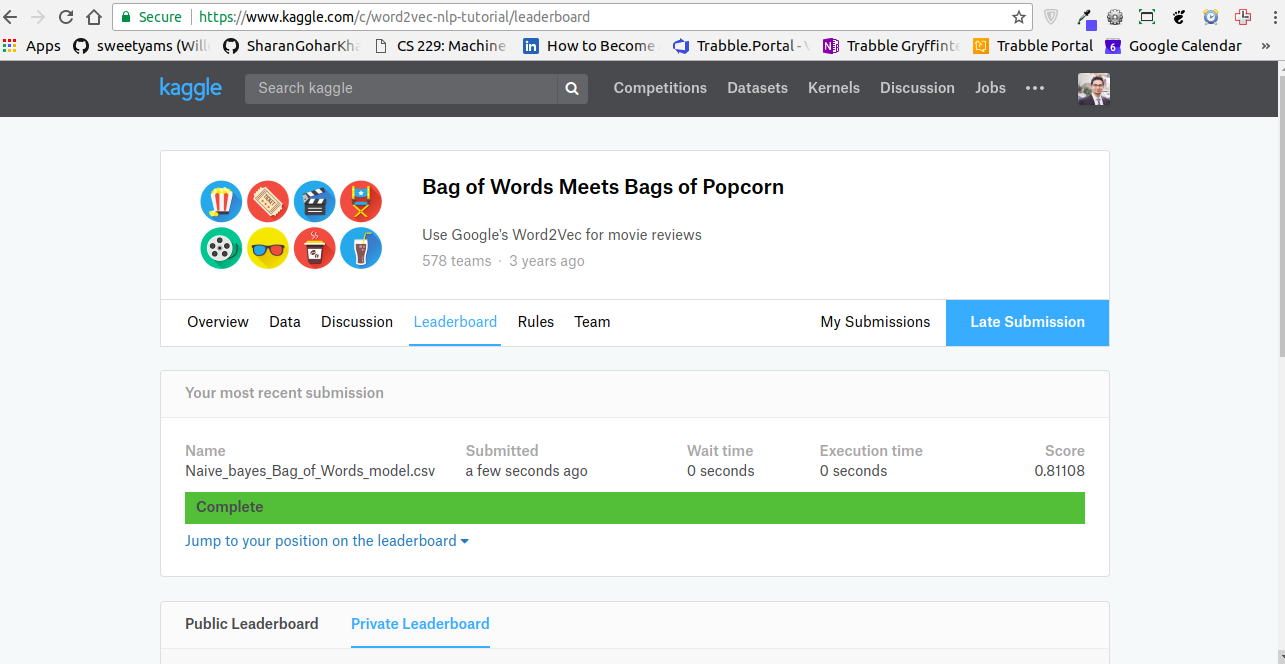

In [86]:
from IPython.display import Image

Image("./image1.png") 